🏨📕**Reservas de Hoteleria** por ***Sofia Moreno***

Data Set: Hotel_Booking.csv

###Introduccion: 🤓

Este conjunto de datos representa un registro detallado de todas las reservas realizadas en un hotel urbano (city hotel) y en un resort, desde julio de 2015 hasta agosto de 2017. La informacion contenida en este dataset es invaluable para analizar las tendencias de reserva, identificar que sucede en las cancelaciones y tomar decisiones estrategicas para mejorar la gestion hotelera.

**Preguntas e Hipótesis de Investigación:**

📆 ***Eventos del año*** - ¿Los eventos especiales en la ciudad o en la región tienen un impacto en el numero de reservas?

🌡️ ***Estaciones del año*** - ¿Existen patrones estacionales en las reservas? ¿Cuales son los meses de mayor y menor ocupación?

📊 ***Comportamiento*** - ¿Existen diferencias significativas en el comportamiento de reserva entre los huéspedes de los hoteles urbanos y los resorts?

🤝 ***Lealtad*** - ¿Los huéspedes repetidos representan una proporcion significativa de las reservas?

###Importaciones y vistazos al dataset 📖

In [30]:
#Importaciones
#DataSet
import kagglehub
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/MyDrive/CoderHouse/hotel_booking.csv'
print("Path to dataset files:", path)
df = pd.read_csv('hotel_booking.csv')

#librerias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

Mounted at /content/drive
Path to dataset files: /content/drive/MyDrive/CoderHouse/hotel_booking.csv


In [3]:
#Conociendo el Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#Prueba de valores nulos
print(df.shape)
df= df.drop_duplicates()
print(df.shape)

(119390, 36)
(119390, 36)


In [5]:
#Valores perdidos
data = df.copy().dropna()
print ("Lo valores perdidos son: ",len(data))

Lo valores perdidos son:  217


In [6]:
#contaremos los nulos
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
#Eliminacion de columnas con muchos valores nulos
df = df.drop(columns=['company', 'agent'])

In [8]:
#Imputar valores con la moda
df['country'].fillna(df['country'].mode()[0], inplace=True)

<ipython-input-8-2dcda0309e7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
#Dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


###Encoding & Scaling ⚙️

In [11]:
#Label Encoder
LE = LabelEncoder()
df['hotel'] = LE.fit_transform(df['hotel'])
df['arrival_date_month'] = LE.fit_transform(df['arrival_date_month'])
df['meal'] = LE.fit_transform(df['meal'])
df['country'] = LE.fit_transform(df['country'])
df['market_segment'] = LE.fit_transform(df['market_segment'])
df['distribution_channel'] = LE.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = LE.fit_transform(df['reserved_room_type'])
df['deposit_type'] = LE.fit_transform(df['deposit_type'])
df['customer_type'] = LE.fit_transform(df['customer_type'])
df['reservation_status'] = LE.fit_transform(df['reservation_status'])
df['reservation_status_date'] = LE.fit_transform(df['reservation_status_date'])
df['arrival_date_year'] = LE.fit_transform(df['arrival_date_year'])
df['arrival_date_week_number'] = LE.fit_transform(df['arrival_date_week_number'])
df['arrival_date_day_of_month'] = LE.fit_transform(df['arrival_date_day_of_month'])
df['stays_in_weekend_nights'] = LE.fit_transform(df['stays_in_weekend_nights'])
df['stays_in_week_nights'] = LE.fit_transform(df['stays_in_week_nights'])
df['adults'] = LE.fit_transform(df['adults'])
df['children'] = LE.fit_transform(df['children'])
df['babies'] = LE.fit_transform(df['babies'])
df['previous_cancellations'] = LE.fit_transform(df['previous_cancellations'])
df['previous_bookings_not_canceled'] = LE.fit_transform(df['previous_bookings_not_canceled'])
df['booking_changes'] = LE.fit_transform(df['booking_changes'])
df['required_car_parking_spaces'] = LE.fit_transform(df['required_car_parking_spaces'])
df['total_of_special_requests'] = LE.fit_transform(df['total_of_special_requests'])
df['assigned_room_type'] = LE.fit_transform(df['assigned_room_type'])
df['is_repeated_guest'] = LE.fit_transform(df['is_repeated_guest'])

print("Valores pasados de objetos a numericos")

Valores pasados de objetos a numericos


In [12]:
#Scanling
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

scaler.fit(df[numerical_features])
scaled_df = pd.DataFrame(scaler.transform(df[numerical_features]), columns=numerical_features)
print("Valores escalados")


Valores escalados


In [13]:
#Valores escalados
scaled_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.407224,-0.76704,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.931005,-1.319371,0.293878,...,0.356939,4.263448,-0.373175,-0.131924,-0.237979,-2.015038,-0.2563,-0.720694,0.703526,-1.739749
1,1.407224,-0.76704,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.931005,-1.319371,0.293878,...,0.356939,5.797673,-0.373175,-0.131924,-0.237979,-2.015038,-0.2563,-0.720694,0.703526,-1.739749
2,1.407224,-0.76704,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.931005,-0.791506,-1.722679,...,0.356939,-0.339228,-0.373175,-0.131924,-0.237979,-0.530935,-0.2563,-0.720694,0.703526,-1.735353
3,1.407224,-0.76704,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.931005,-0.791506,-1.722679,...,-0.707596,-0.339228,-0.373175,-0.131924,-0.237979,-0.530935,-0.2563,-0.720694,0.703526,-1.735353
4,1.407224,-0.76704,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.931005,-0.263641,0.293878,...,-0.707596,-0.339228,-0.373175,-0.131924,-0.237979,-0.075810,-0.2563,0.540666,0.703526,-1.730957


###PCA ⚒️

In [14]:
#PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=['PC1', 'PC2'])
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,119390.0,1.523569e-17,1.900556,-19.854110,-1.241990,-0.186398,1.044841,8.499540
PC2,119390.0,7.236954e-17,1.699148,-15.756442,-0.814439,0.260988,1.171086,24.515327


In [15]:
PCA_df.head()

,PC1,PC2
0,1.053829,-2.949368
1,1.605744,-2.245896
2,0.733758,-3.296506
3,1.177861,-4.029485
4,0.063594,-0.648970


###Entrenamiento al modelo    💪

In [16]:
#Entrenamiento
X = PCA_df[['PC1']]
Y = PCA_df['PC2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [17]:
#Entrenamiento del modelo
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
hotel_encoded = encoder.fit_transform(df[['hotel']])
hotel_encoded_df = pd.DataFrame(hotel_encoded, columns=encoder.get_feature_names_out(['hotel']))
X = pd.concat([PCA_df, hotel_encoded_df], axis=1)
y = df['is_canceled']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Entrenar el modelo de regresion logistica
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

In [18]:
#Prueba
y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.9514476365971466
Confusion Matrix:  [[21960   411]
 [ 1328 12118]]
Classification Report:                precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     22371
         1.0       0.97      0.90      0.93     13446

    accuracy                           0.95     35817
   macro avg       0.96      0.94      0.95     35817
weighted avg       0.95      0.95      0.95     35817



In [19]:
# Crear el modelo
model = LogisticRegression()

# Evaluar con validacion cruzada (K-Fold con 5 divisiones)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Mostrar los resultados
print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", scores.mean())
print("Desviacion estándar:", scores.std())


Accuracy en cada fold: [0.90409582 0.91925622 0.95016333 0.94178742 0.93123377 0.97604489
 0.95477008 0.96582628 0.97436971 0.96322975]
Accuracy promedio: 0.9480777284529692
Desviacion estándar: 0.02270580908572855


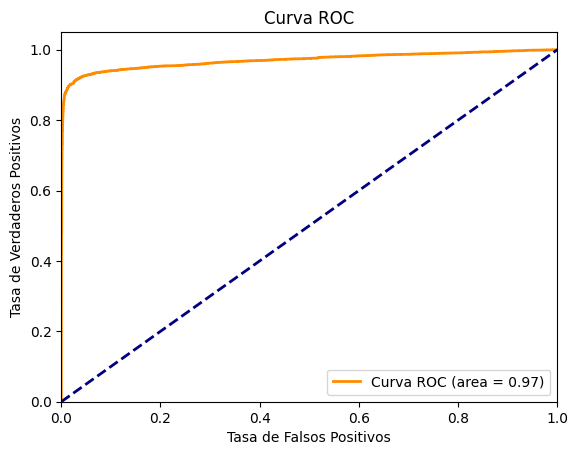

In [20]:
#Regresion
model = LogisticRegression()
model.fit(X_train, y_train)

# Calcular las probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Grafico de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Me quede conforme con los resultados, por eso opto por continuar con mi modelo 🥰

###Analisis### 📊

In [21]:
#Probabilidad de Cancelacion
X_nueva_reserva = pd.DataFrame([[100, 15, 2, 0]],
                                columns=['lead_time', 'arrival_date_day_of_month', 'adults', 'children'])

numerical_features = df.select_dtypes(include=['number']).columns

X_nueva_reserva_full = pd.DataFrame([[0] * len(numerical_features)], columns=numerical_features)
X_nueva_reserva_full['lead_time'] = X_nueva_reserva['lead_time']
X_nueva_reserva_full['arrival_date_day_of_month'] = X_nueva_reserva['arrival_date_day_of_month']
X_nueva_reserva_full['adults'] = X_nueva_reserva['adults']
X_nueva_reserva_full['children'] = X_nueva_reserva['children']


# Escalado
X_nueva_reserva_scaled = scaler.transform(X_nueva_reserva_full)
X_nueva_reserva_scaled_df = pd.DataFrame(X_nueva_reserva_scaled, columns=numerical_features)
X_nueva_reserva_pca_df = pd.DataFrame(pca.transform(X_nueva_reserva_scaled_df), columns=['PC1', 'PC2']) #This line was missing

# One-hot encoding
hotel_value = 0  # 0 - 'Resort Hotel', 1 for 'City Hotel'
hotel_encoded_new = encoder.transform([[hotel_value]])
hotel_encoded_new_df = pd.DataFrame(hotel_encoded_new, columns=encoder.get_feature_names_out(['hotel']))

# PCA y one-hot encoding
X_nueva_reserva_final = pd.concat([X_nueva_reserva_pca_df, hotel_encoded_new_df], axis=1)

#Predecir
probabilidad_cancelacion = model.predict_proba(X_nueva_reserva_final)[:, 1]
print(f"Probabilidad de cancelacion: {probabilidad_cancelacion[0]:.2%}")

Probabilidad de cancelacion: 0.75%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


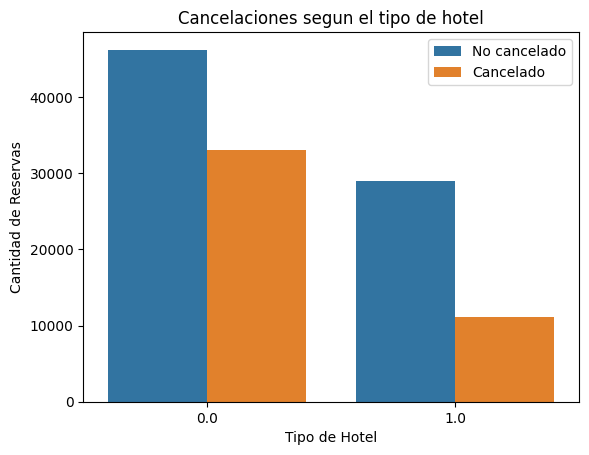

In [22]:
#Cancelaciones segun el tipo de hotel
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancelaciones segun el tipo de hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de Reservas')
plt.legend(['No cancelado', 'Cancelado'])
plt.show()


La altura de cada barra representa la cantidad de reservas de cada tipo, divididas en aquellas que fueron canceladas y aquellas que no.
Claramente se observa que uno de los tipos de hotel (el representado por 0.0, City Hotel) tiene una tasa de cancelacion significativamente mayor que el otro (representado por 1.0, Resort Hotel). Esto significa que los huespedes de este tipo de hotel tienden a cancelar sus reservas con mas frecuencia.

**Entonces...**
Podria ser necesario implementar estrategias diferentes para cada tipo de hotel para reducir las tasas de cancelacion, por ejemplo, se podria ofrecer politicas de cancelacion mas flexibles para el tipo de hotel con mayor tasa de cancelacion.

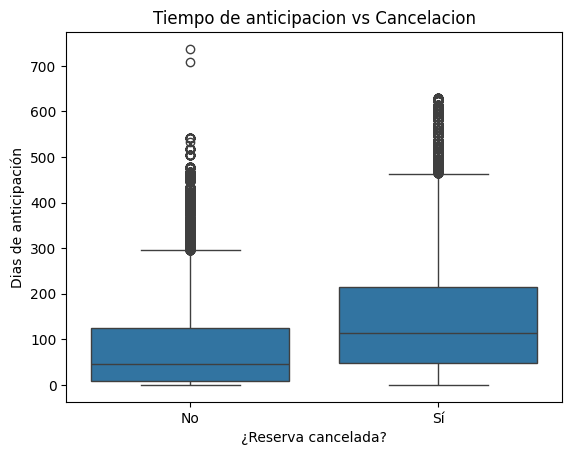

In [23]:
#Tiempo de anticipacion y cancelacion
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Tiempo de anticipacion vs Cancelacion')
plt.xlabel('¿Reserva cancelada?')
plt.ylabel('Dias de anticipación')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()



**Comparacion entre grupos:**

Al comparar ambas cajas, podemos observar que la mayoria de las reservas que son canceladas se realizan con mas anticipacion que las reservas que no se cancelan. Esto nos indica una posible relacion entre el tiempo de anticipacion y la probabilidad de cancelacion.

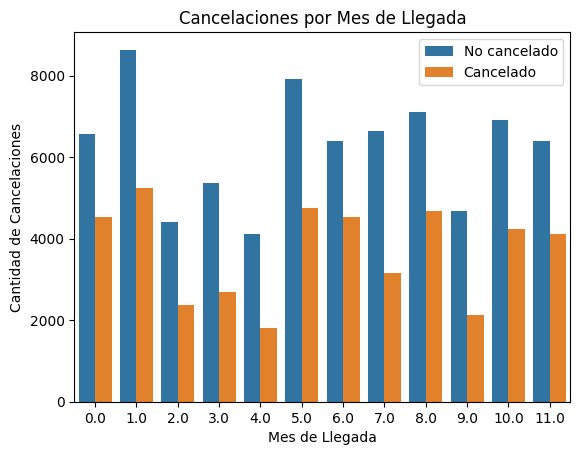

In [24]:
#Cancelaciones por mes de llegada
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, order=sorted(df['arrival_date_month'].unique()))
plt.title('Cancelaciones por Mes de Llegada')
plt.xlabel('Mes de Llegada')
plt.ylabel('Cantidad de Cancelaciones')
plt.legend(['No cancelado', 'Cancelado'])
plt.show()

**Tendencia estacional:**

Se observa una clara tendencia estacional en las cancelaciones. Algunos meses tienen una mayor proporcion de cancelaciones que otros. Esto sugiere que factores estacionales, como eventos especiales, vacaciones o temporadas altas y bajas, pueden influir en la decisión de los clientes de cancelar sus reservas.

**Meses con mas cancelacion:**

Los meses con las barras naranjas (cancelaciones) mas altas indican los meses con mayores tasas de cancelacion. Estos meses podriamos considerarlos como "meses criticos" y requieren una atencion especial de estrategias para la gestion de reservas.

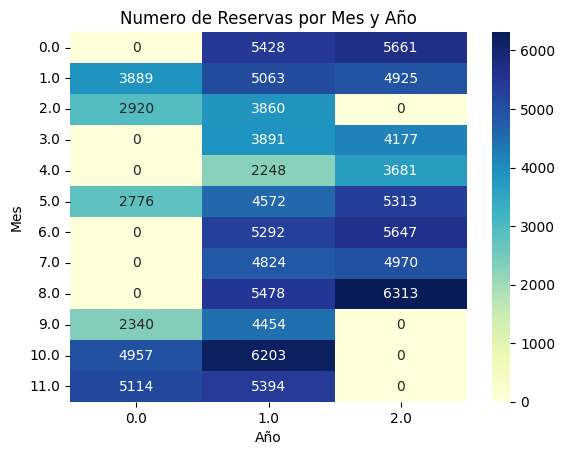

In [25]:
#Grafico de Calor: Distribucion de reservas por mes y año
pivot_table = df.pivot_table(index='arrival_date_month', columns='arrival_date_year', values='is_canceled', aggfunc='count', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Numero de Reservas por Mes y Año')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()


**Estacionalidad Pronunciada** en los meses pico, se observa una alta demanda en los meses de verano (julio y agosto) para los tres años analizados. Esto es típico en la industria hotelera, especialmente en destinos turísticos.
Los meses bajos fueron en invierno (enero y febrero) presentan generalmente un menor número de reservas, lo que indica una temporada baja.

Existe una tendencia general al alza en el número de reservas a lo largo de los años, especialmente en los meses de alta temporada. Esto sugiere un crecimiento en la popularidad del destino o una mejora en las estrategias de marketing del hotel.

Valores perdidos

El año 2017 presenta algunos datos faltantes, especialmente a partir de la segunda mitad del año.

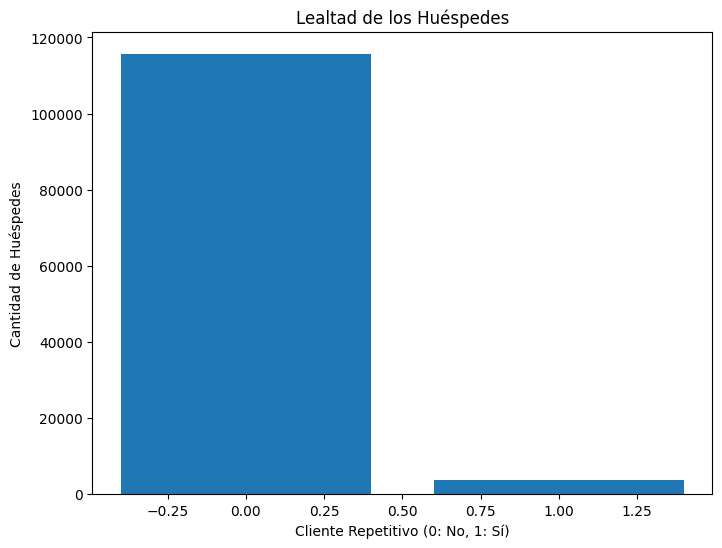

In [26]:
plt.figure(figsize=(8, 6))
conteo = df['is_repeated_guest'].value_counts()
plt.bar(conteo.index, conteo.values)
plt.title('Lealtad de los Huéspedes')
plt.xlabel('Cliente Repetitivo (0: No, 1: Sí)')
plt.ylabel('Cantidad de Huéspedes')
plt.show()

El grafico muestra una disparidad significativa en la lealtad de los huespedes. La gran mayoria de los clientes son considerados "no repetitivos" (representados por el valor 0 en el eje x), mientras que solo una pequeña porcion se clasifica como "clientes repetitivos" (valor 1). Existe una fuerte baja de retencion y una alta necesidad de mejorar la experiencia del cliente tanto en reservas online, offline, y por agencias de turismo.

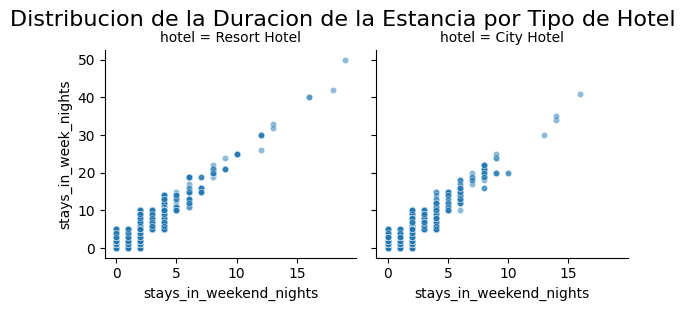

In [32]:
g = sns.FacetGrid(df, col="hotel")
g.map(sns.scatterplot, "stays_in_weekend_nights", "stays_in_week_nights", alpha=0.5, s=20)
plt.suptitle('Distribucion de la Duracion de la Estancia por Tipo de Hotel', fontsize=16, y=1.02)
plt.show()


En ambos tipos de hotel (Resort Hotel y City Hotel), parece haber una tendencia creciente, es decir, los clientes que se quedan mas noches los fines de semana tambien tienden a quedarse mas noches entre semana.
Sin embargo, la pendiente parece ser más pronunciada en los Resort Hotels, lo que podria indicar que en estos hoteles las estancias suelen ser mas largas.

Esto tiene sentido porque los **hoteles de ciudad** suelen ser usados para viajes de negocios o estancias cortas, mientras que los **resorts** suelen recibir huespedes que buscan vacaciones prolongadas.